**Задача: определить портрет клиента, открывающего кредитный счет в банке.**

# *Импорт библиотек и чтение файла.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.utils import shuffle
%config InlineBackend.figure_format = 'svg'

In [2]:
credit = pd.read_csv('credit.csv', delimiter=';')

In [3]:
credit.head(5)

client_id  gender   age  marital_status  job_position credit_sum  \
0          1       2  48.0             3.0            15      59998   
1          2       1  28.0             NaN            15      10889   
2          3       2  32.0             3.0            14      10728   
3          4       1  27.0             2.0            14   12009,09   
4          5       2  45.0             3.0            14   16908,89   

   credit_month score_shk  education  tariff_id  living_region  okrug  \
0            10  0,770249        2.0         28           23.0    8.0   
1             6  0,248514        2.0          2           30.0    7.0   
2            12  0,459589        4.0          2           64.0    2.0   
3            12  0,362536        2.0          2            8.0    8.0   
4            10  0,421385        4.0          2           77.0    6.0   

   avregzarplata  monthly_income  credit_count  overdue_credit_count  \
0        25850.0         30000.0           1.0                   1.0   
1        66880.0         43000.0           2.0                   0.0   
2        23430.0         23000.0           5.0                   0.0   
3        23650.0         17000.0           2.0                   0.0   
4        26620.0             NaN           1.0                   0.0   

   open_account_flg  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

# *Проверка данных.*

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [5]:
credit.isnull().sum()

client_id                  0
gender                     0
age                        2
marital_status             5
job_position               0
credit_sum                 1
credit_month               0
score_shk                  3
education                  3
tariff_id                  0
living_region            192
okrug                    192
avregzarplata            192
monthly_income             2
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

*Количественные данные:*

*   возраст;
*   сумма кредита;
*   ежемесячный доход;
*   остаток по времени выплаты кредита;
*   средняя зарплата по региону;
*   скоринговая оценка;
*   количество кредитов;
*   количество просроченных кредитов.

*Номинативные данные, выраженные кодированием:*

*   пол;
*   семейное положение;
*   работа;
*   образование;
*   тариф
*   регион (округ)

*Бинарные данные: факт открытия кредита в банке.*

In [6]:
credit['score_shk'] = credit['score_shk'].str.replace(',', '.').astype(float)
credit['credit_sum'] = credit['credit_sum'].str.replace(',','.').astype(float)

In [7]:
credit[['score_shk', 'credit_sum']].head(5)

score_shk  credit_sum
0   0.770249    59998.00
1   0.248514    10889.00
2   0.459589    10728.00
3   0.362536    12009.09
4   0.421385    16908.89

In [8]:
credit[['age', 'credit_sum', 'credit_month', 'monthly_income']].describe()

age     credit_sum   credit_month  monthly_income
count  170744.000000  170745.000000  170746.000000   170744.000000
mean       36.497312   26095.102278      10.980749    40138.377015
std        10.546067   16234.826253       3.536698    25044.251878
min        18.000000    2736.000000       3.000000     5000.000000
25%        28.000000   14908.000000      10.000000    25000.000000
50%        34.000000   21229.000000      10.000000    35000.000000
75%        43.000000   32068.000000      12.000000    50000.000000
max        71.000000  200000.000000      36.000000   950000.000000

In [9]:
credit.duplicated().value_counts()

False    170746
dtype: int64

# *Очистка и обработка данных.*

**Возраст**

In [10]:
credit[credit['age'].isnull()]

client_id  gender  age  marital_status  job_position  credit_sum  \
6           7       2  NaN             3.0            14     10317.0   
15         16       2  NaN             3.0            14     13209.0   

    credit_month  score_shk  education  tariff_id  living_region  okrug  \
6              6   0.276012        4.0         25           33.0    2.0   
15            10   0.498255        4.0          2           40.0    2.0   

    avregzarplata  monthly_income  credit_count  overdue_credit_count  \
6         26840.0         28000.0           3.0                   0.0   
15        27280.0         34000.0           2.0                   0.0   

    open_account_flg  
6                  0  
15                 0

<Axes: xlabel='age', ylabel='Count'>

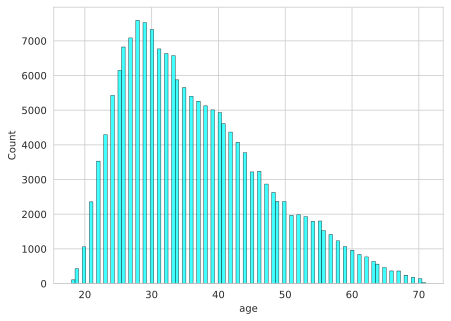

In [11]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.histplot(x=credit['age'], color='cyan', edgecolor='black', label='Age distribution')

In [12]:
print('median: ', credit['age'].median(), 'mean: ', credit['age'].mean())

median:  34.0 mean:  36.49731176498149


*Распределение скошено вправо. Но нужно учесть, что правая сторона ограничена возрастом совершеннолетия, а медиана и среднее близки по значению. Вставляем медиану - импутация двух значений не повлияет на распределение.*

In [13]:
credit['age'] = credit['age'].fillna(value = credit['age'].median())

**Семейный статус, образование**

In [14]:
credit['marital_status'].value_counts()

3.0    93952
4.0    52148
2.0    16970
1.0     4196
5.0     3475
Name: marital_status, dtype: int64

*Имеется 5 пропущенных значений в "семейном статусе" и 3 - в "образовании".*

*Вставим моду (но, чтобы не преобразовывать объект pd.serias в число, в формулу вставим медиану, так как для данных столбцов мода и медиана равны по значению)*

In [15]:
credit['marital_status'] = credit['marital_status'].fillna(credit['marital_status'].median())

In [16]:
credit['education'].value_counts()

4.0    87537
2.0    72593
5.0     9941
3.0      565
1.0      107
Name: education, dtype: int64

In [17]:
credit['education'] = credit['education'].fillna(credit['education'].median())

**Сумма кредита, скоринговая оценка и доход.**

In [18]:
credit[credit['credit_sum'].isnull()]

client_id  gender   age  marital_status  job_position  credit_sum  \
10         11       2  26.0             3.0            14         NaN   

    credit_month  score_shk  education  tariff_id  living_region  okrug  \
10            14    0.44543        4.0          1           63.0    3.0   

    avregzarplata  monthly_income  credit_count  overdue_credit_count  \
10        45430.0         36000.0           2.0                   0.0   

    open_account_flg  
10                 0

<Axes: xlabel='credit_sum', ylabel='Count'>

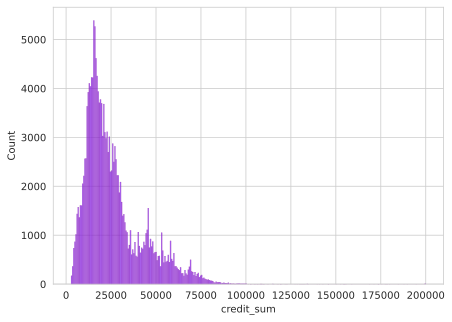

In [19]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.histplot(x=credit['credit_sum'], color='blueviolet', edgecolor='purple', label='Credit amount')

*Одно пустое значение можно заменить на среднее.*

In [20]:
credit['credit_sum'] = credit['credit_sum'].fillna(credit['credit_sum'].mean())

In [21]:
credit[credit['score_shk'].isnull()]

client_id  gender   age  marital_status  job_position  credit_sum  \
12         13       2  37.0             3.0            14     42289.0   
16         17       2  36.0             2.0            14     22612.0   
20         21       1  28.0             3.0            14     15980.0   

    credit_month  score_shk  education  tariff_id  living_region  okrug  \
12            10        NaN        4.0         28            3.0    3.0   
16            10        NaN        4.0         20           23.0    8.0   
20            12        NaN        4.0          2           64.0    2.0   

    avregzarplata  monthly_income  credit_count  overdue_credit_count  \
12        36850.0         70000.0           1.0                   0.0   
16        25850.0         50000.0           4.0                   0.0   
20        23430.0         23000.0           3.0                   0.0   

    open_account_flg  
12                 0  
16                 0  
20                 1

In [22]:
credit['score_shk'].describe()

count    170743.000000
mean          0.469471
std           0.124268
min           0.000000
25%           0.379495
50%           0.461599
75%           0.552412
max           1.128291
Name: score_shk, dtype: float64

*Внутреннюю скоринговую оценку осуществялет банк: если по информации из присутствующих в таблице данных ее не осуществили, значит, этой информации недостаточно. Либо это ошибка при вводе данных. Лучшим способом будет удалить строки.*

In [23]:
credit = credit.dropna(subset=['score_shk'])

*Значения по доходу отсутствуют по двум ячейкам.*

In [24]:
credit['monthly_income'].value_counts()

30000.0     17632
25000.0     14694
40000.0     13665
35000.0     12345
50000.0     12299
            ...  
18441.0         1
950000.0        1
16570.0         1
57540.0         1
14460.0         1
Name: monthly_income, Length: 1591, dtype: int64

*Думаю, чтобы лучше увидеть распределение дохода на графике, можно ограничить размер дохода по верхней границе в 150 000.*

<Axes: xlabel='monthly_income', ylabel='Count'>

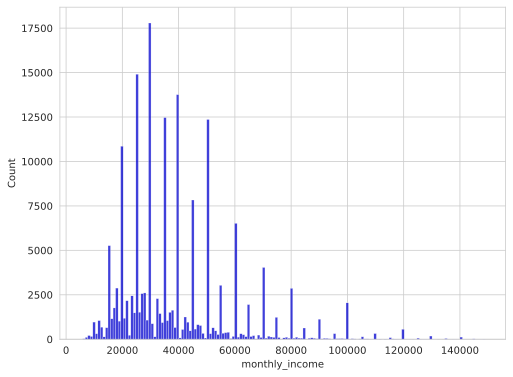

In [25]:
credit_ = credit[(credit.monthly_income < 150000)]
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.histplot(x=credit_['monthly_income'], color='mediumblue', label='Income')

 *Судя по гравику, округление по зарплате уже использовались. График мультимодальный, среднее и медиана будут не показательны. Думаю, уместнее всего удалить два значения.*

In [26]:
credit = credit.dropna(subset=['monthly_income'])

**Регион проживания, федеральный округ и средняя зарплата по региону.**

In [27]:
credit[credit['living_region'].isnull()]

client_id  gender   age  marital_status  job_position  credit_sum  \
578           579       2  32.0             3.0            14      8543.0   
919           920       2  40.0             3.0            14     29218.0   
1921         1922       1  32.0             3.0            14     31258.0   
2802         2803       2  26.0             3.0            14     22736.0   
5633         5634       2  36.0             4.0             2     67869.0   
...           ...     ...   ...             ...           ...         ...   
166721     166722       2  28.0             3.0            14     73569.0   
168491     168492       2  26.0             4.0            14     15108.0   
168968     168969       1  41.0             3.0            15     17972.0   
169670     169671       2  29.0             4.0            15     40888.0   
170294     170295       2  38.0             3.0            14     59326.0   

        credit_month  score_shk  education  tariff_id  living_region  okrug  \
578               12   0.501101        4.0          2            NaN    NaN   
919               12   0.428999        4.0          2            NaN    NaN   
1921              12   0.481957        2.0          2            NaN    NaN   
2802              24   0.332486        5.0          2            NaN    NaN   
5633              12   0.342860        2.0          2            NaN    NaN   
...              ...        ...        ...        ...            ...    ...   
166721            12   0.377390        2.0          2            NaN    NaN   
168491            10   0.612060        4.0         28            NaN    NaN   
168968            10   0.320842        2.0         19            NaN    NaN   
169670            12   0.605232        5.0         28            NaN    NaN   
170294            18   0.560629        4.0          2            NaN    NaN   

        avregzarplata  monthly_income  credit_count  overdue_credit_count  \
578               NaN         17000.0           1.0                   0.0   
919               NaN         20000.0           1.0                   0.0   
1921              NaN         24000.0           0.0                   0.0   
2802              NaN         35000.0           1.0                   0.0   
5633              NaN         70000.0           1.0                   0.0   
...               ...             ...           ...                   ...   
166721            NaN        180000.0           1.0                   0.0   
168491            NaN         15000.0           0.0                   0.0   
168968            NaN         43000.0           5.0                   0.0   
169670            NaN         80000.0           2.0                   0.0   
170294            NaN         30000.0           0.0                   0.0   

        open_account_flg  
578                    0  
919                    0  
1921                   0  
2802                   0  
5633                   0  
...                  ...  
166721                 0  
168491                 0  
168968                 0  
169670                 0  
170294                 0  

[192 rows x 17 columns]

*Все пропущенные значения в одних и тех же строках. Можно проставить моду, как самое частое значение.*

In [28]:
credit['living_region'].value_counts()

31.0    12844
30.0     9261
73.0     8735
23.0     8354
63.0     8303
        ...  
45.0       54
81.0       32
78.0       31
49.0       19
79.0       17
Name: living_region, Length: 81, dtype: int64

In [29]:
credit['okrug'].value_counts()

7.0    39049
2.0    36091
6.0    22551
3.0    22302
5.0    18602
8.0    18553
1.0     7073
4.0     6328
Name: okrug, dtype: int64

In [30]:
fed = pd.DataFrame(credit.groupby(['okrug','living_region'])['client_id'].nunique())

In [31]:
fed[65:70]

client_id
okrug living_region           
7.0   28.0                 869
      30.0                9261
      31.0               12844
      38.0                 748
      61.0                 728

*31 регион относится к 7 округу (и регион и округ являются модой по своим колонкам). Так что вставляем в пропущенные столбцы значения для 31 региона 7 округа.*

In [32]:
credit[(credit.living_region == 31.0)].head(3)

client_id  gender   age  marital_status  job_position  credit_sum  \
7           8       1  26.0             4.0            14     47878.0   
27         28       1  34.0             4.0            14     11462.0   
30         31       1  26.0             4.0            14     26868.0   

    credit_month  score_shk  education  tariff_id  living_region  okrug  \
7             10   0.512525        2.0          2           31.0    7.0   
27             6   0.327044        4.0         20           31.0    7.0   
30            10   0.322838        2.0          2           31.0    7.0   

    avregzarplata  monthly_income  credit_count  overdue_credit_count  \
7         42460.0         60000.0           3.0                   0.0   
27        42460.0         12000.0           1.0                   0.0   
30        42460.0         25000.0           1.0                   0.0   

    open_account_flg  
7                  0  
27                 1  
30                 0

In [33]:
credit['avregzarplata'] = credit['avregzarplata'].fillna(value = 42460.0)
credit['okrug'] = credit['okrug'].fillna(value = 7.0)
credit['living_region'] = credit['living_region'].fillna(value = 31.0)

**Количество кредитов/ просроченных кредитов у клиента.**

In [34]:
credit['credit_count'].value_counts()

1.0     45277
2.0     36997
0.0     25806
3.0     23917
4.0     14112
5.0      7543
6.0      3915
7.0      1962
8.0      1007
9.0       476
10.0      220
11.0      129
12.0       74
13.0       33
14.0       15
15.0       13
17.0        5
16.0        4
19.0        3
18.0        2
21.0        1
Name: credit_count, dtype: int64

*В задании этот столбец помечен как "количество кредитов у клиента". Исходя из того, что в данном столбце имеется разброс с максимумом в 21 единицу, предполагаю, что речь о количестве кредитов, взятых за весь период пользования услугами банка. Посмотрим на распределение, чтобы проставить пропуски.*

In [35]:
credit[(credit.credit_count >= 17)].head(3)

client_id  gender   age  marital_status  job_position  credit_sum  \
54141      54142       1  54.0             2.0            15     17686.0   
81457      81458       1  40.0             3.0            14      7989.0   
83657      83658       1  54.0             3.0             2     20659.0   

       credit_month  score_shk  education  tariff_id  living_region  okrug  \
54141            10   0.294722        4.0         19           24.0    5.0   
81457            10   0.400840        2.0          2           24.0    5.0   
83657            10   0.463158        2.0          2           40.0    2.0   

       avregzarplata  monthly_income  credit_count  overdue_credit_count  \
54141        29260.0         67000.0          19.0                   0.0   
81457        29260.0         45000.0          17.0                   0.0   
83657        27280.0         80000.0          17.0                   0.0   

       open_account_flg  
54141                 0  
81457                 1  
83657                 0

<Axes: xlabel='credit_count', ylabel='Count'>

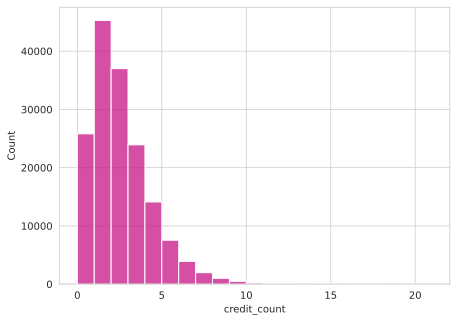

In [36]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.histplot(x=credit['credit_count'], color='mediumvioletred', label='Credit count', binwidth = 1)

*Итак, у нас распределение со скосом вправо, но близкое к нормальному. Чтобы не ломать распределение, вставим историю по количеству кредитов рандомно, но согласно распределения.*

In [37]:
mask = credit['credit_count'].isna()

In [38]:
p = credit['credit_count'].value_counts()/ len(credit['credit_count'].dropna())

In [39]:
credit.loc[mask,['credit_count']] = np.random.choice(p.index.to_list(), size = mask.sum(), p = p.to_list())

<Axes: xlabel='credit_count', ylabel='Count'>

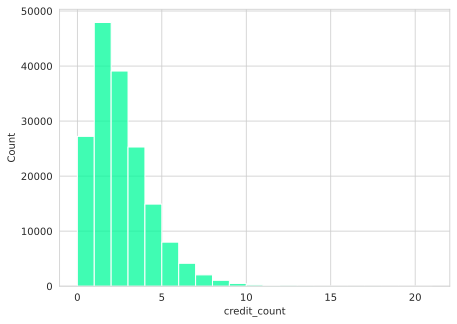

In [40]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.histplot(x=credit['credit_count'], color='mediumspringgreen', label='Credit count', binwidth = 1)

*Теперь посмотрим на количество просроченных кредитов.*

In [41]:
credit['overdue_credit_count'].value_counts()

0.0    154130
1.0      7326
2.0        50
3.0         5
Name: overdue_credit_count, dtype: int64

*Думаю, есть смысл проверить распределение относительно количества кредитов и дохода.*

<Axes: xlabel='overdue_credit_count', ylabel='credit_count'>

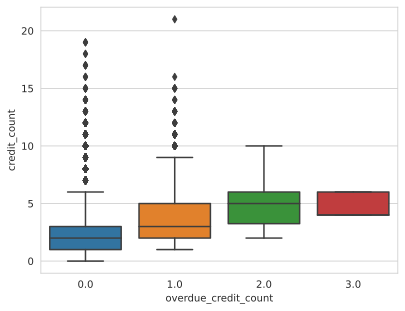

In [42]:
sns.boxplot(data=credit, y=credit['credit_count'], x=credit['overdue_credit_count'])

*Исходя из графиков, можно заметить, что прямой зависимости между количеством кредитов и количеством задолженности нет. 2 и более задолженности группируют около 4-10 кредитов, а показатели для 0 и 1 не позволяют выявить закономерность. Единственное, что можно отметить - если у клиента менее 3х кредитов, то просроченных быть не должно.*

<Axes: xlabel='overdue_credit_count', ylabel='monthly_income'>

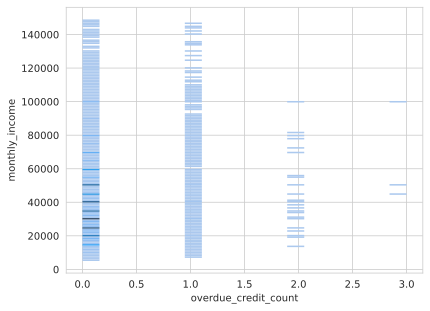

In [43]:
sns.histplot(data=credit_, y=credit_['monthly_income'], x=credit_['overdue_credit_count'])

*Для сравнения по доходу, взяла таблицу с ограничением до 150к. Доход так же равномерно распределяется между 0 и 1. Будем вставлять значения по общему количеству кредитов.*

In [44]:
credit['overdue_credit_count'] = credit['overdue_credit_count'].fillna(10)

In [45]:
credit.loc[(credit.credit_count < 4) & (credit.overdue_credit_count == 10), 'overdue_credit_count'] = 0.0

In [46]:
credit.loc[(credit.credit_count >= 4) & (credit.overdue_credit_count == 10), 'overdue_credit_count'] = np.random.randint(0.0,1.0)

*Проверим, все ли данные проставлены.*

In [47]:
credit.isnull().sum()

client_id               0
gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
score_shk               0
education               0
tariff_id               0
living_region           0
okrug                   0
avregzarplata           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

# Исследовательский анализ данных.

**Количественные данные.**

In [48]:
cols = credit[['age', 'credit_sum', 'credit_count', 'monthly_income', 'credit_month', 'overdue_credit_count']]

<Axes: >

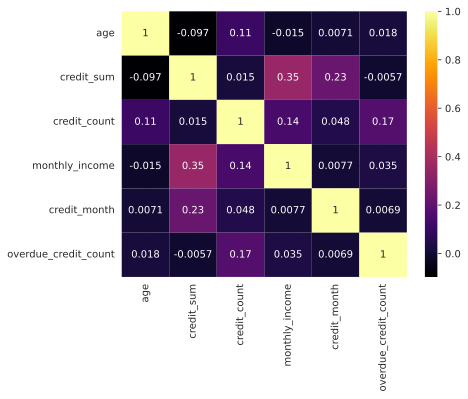

In [49]:
sns.heatmap(cols.corr(), cmap = 'inferno', annot = True)

*Корреляция между количественными данными слабая. Будем проверять каждую величину относительно ключевого столбца с помощью ящика с усами.*

<Axes: xlabel='open_account_flg', ylabel='age'>

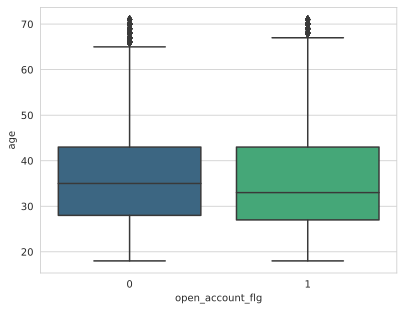

In [50]:
sns.boxplot(data=credit, y = 'age', x='open_account_flg', palette = 'viridis')

<Axes: xlabel='open_account_flg', ylabel='credit_sum'>

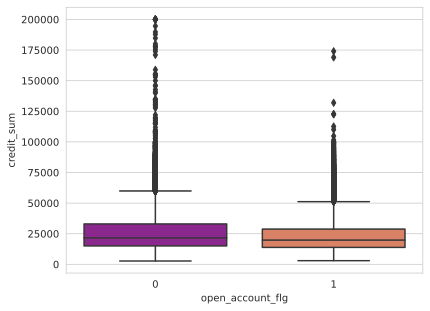

In [51]:
sns.boxplot(data=credit, y = 'credit_sum', x='open_account_flg', palette = 'plasma')

<Axes: xlabel='open_account_flg', ylabel='monthly_income'>

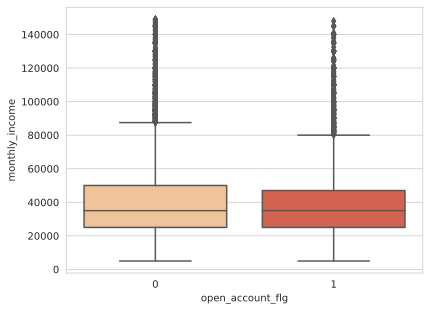

In [52]:
sns.boxplot(data=credit_, y = 'monthly_income', x='open_account_flg', palette = 'OrRd')

*Итого: по ключевым количественным показателям графики практически идентичны. Можно проверить статистику по сумме кредита. По остальным признакам группы не различаются.*

In [53]:
credit.groupby(['open_account_flg'])['credit_sum'].describe(percentiles=[])

count          mean           std     min      50%  \
open_account_flg                                                          
0                 140686.0  26635.759891  16459.456736  2736.0  21600.0   
1                  30055.0  23564.964852  14880.988505  3000.0  19789.0   

                       max  
open_account_flg            
0                 200000.0  
1                 174000.0

*Разделим датасет на 2 группы по последнему столбцу.*

In [54]:
open_yes = credit[(credit.open_account_flg == 1)]
open_no = credit[(credit.open_account_flg == 0)]
len(open_yes), len(open_no)

(30055, 140686)

*Выборки: большие и разноразмерные. При таком размере выборки вероятность совершить ошибку первого рода возрастает.*

*Решение: перемешать строки и выбрать для сравнения одноразмерные выборки.*

In [55]:
open_yes.head(5)

client_id  gender   age  marital_status  job_position  credit_sum  \
17         18       1  54.0             4.0            15    24990.00   
21         22       2  40.0             3.0             4    18890.00   
25         26       1  22.0             4.0            14    30000.00   
27         28       1  34.0             4.0            14    11462.00   
32         33       2  34.0             3.0            14    18623.33   

    credit_month  score_shk  education  tariff_id  living_region  okrug  \
17            12   0.413558        2.0          2           73.0    6.0   
21             6   0.298918        2.0         25           17.0    7.0   
25            18   0.550770        5.0          2           46.0    2.0   
27             6   0.327044        4.0         20           31.0    7.0   
32            10   0.272424        2.0         19            5.0    7.0   

    avregzarplata  monthly_income  credit_count  overdue_credit_count  \
17        56000.0         40000.0           6.0                   0.0   
21        27060.0         45000.0           5.0                   0.0   
25        28160.0         30000.0           1.0                   0.0   
27        42460.0         12000.0           1.0                   0.0   
32        27280.0         35000.0           2.0                   0.0   

    open_account_flg  
17                 1  
21                 1  
25                 1  
27                 1  
32                 1

In [56]:
open_yes = shuffle(open_yes)
open_no = shuffle(open_no)

In [57]:
open_yes.head(5)

client_id  gender   age  marital_status  job_position  credit_sum  \
65777      65778       2  23.0             4.0            14    27088.64   
8965        8966       1  57.0             3.0            10     5368.00   
43104      43105       1  64.0             4.0            14    22468.00   
42333      42334       1  55.0             3.0            14    19124.00   
62857      62858       1  42.0             3.0            14    35658.00   

       credit_month  score_shk  education  tariff_id  living_region  okrug  \
65777            12   0.608025        4.0         28           66.0    6.0   
8965              6   0.548612        4.0          2           64.0    2.0   
43104            10   0.455038        2.0         19           19.0    4.0   
42333            10   0.472968        4.0         19           71.0    5.0   
62857            24   0.550463        2.0         20           77.0    6.0   

       avregzarplata  monthly_income  credit_count  overdue_credit_count  \
65777        32780.0         23000.0           2.0                   0.0   
8965         23430.0          7000.0           1.0                   0.0   
43104        18040.0         30000.0           2.0                   0.0   
42333        32230.0         40000.0           7.0                   0.0   
62857        26620.0         25000.0           1.0                   0.0   

       open_account_flg  
65777                 1  
8965                  1  
43104                 1  
42333                 1  
62857                 1

*Гипотезы: Н0 - выборки не отличаются по сумме кредита. Н1 - сумма кредита является статистически значимым показателем.
Пороговое значение: 0.05.*

In [58]:
statistics_c, p_value_c = st.ttest_ind(open_yes['credit_sum'][:500], open_no['credit_sum'][:500])
print(f'''Статистика: {statistics_c}.
Уровень значимости: {p_value_c}.''')

Статистика: -2.5948975089964543.
Уровень значимости: 0.009600715917136302.


***Исходя из полученных данных, можно сделать вывод, что различия в сумме кредита в группах 0 и 1 статистически значимы. И мы можем учитывать этот признак при формировании портрета заемщика.***

*Сравним результат с выборкой по возрасту. Согласно графика: разница не будет статистически значимой.*

In [59]:
open_yes = shuffle(open_yes)
open_no = shuffle(open_no)

In [60]:
statistics_c, p_value_c = st.ttest_ind(open_yes['age'][:500], open_no['age'][:500])
print(f'''Статистика: {statistics_c}.
Уровень значимости: {p_value_c}.''')

Статистика: -0.5780748974232616.
Уровень значимости: 0.5633439631609184.


***Как можно заметить, при сопоставлении возраста статистической значимости не выявлено. Цифры не указываю, посколько при смешивании используется рандомная выборка, и от эксперимента к эксперименту статистика будет отличаться, но для суммы по кредиту статистика будет по-прежнему ниже порогового уровня, а для возраста - выше.***

*Теперь посмотрим на распределение количества кредитов и просрочек по кредитам.*

<Axes: xlabel='open_account_flg', ylabel='credit_count'>

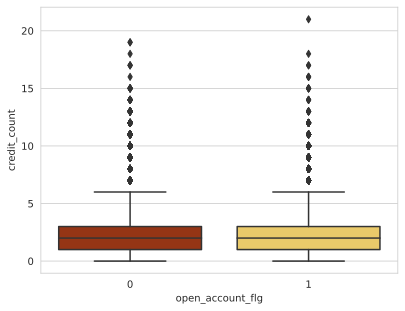

In [61]:
sns.boxplot(data=credit_, y = 'credit_count', x='open_account_flg', palette = 'afmhot')

<Axes: xlabel='open_account_flg', ylabel='count'>

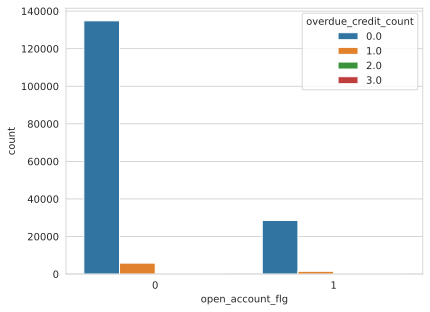

In [62]:
sns.countplot(x='open_account_flg', hue='overdue_credit_count', data=credit)

*Исходя из графиков, можно заключить, что история по кредитованию не имеет статистической значимости, а количество просроченных кредитов - только если рассматривать просрочку более 1 кредита, но таких клиентов очень мало и от общего количества, поэтому данный пункт так же нет смысла включать в портрет клиентов, открывающих кредит.*

**Скоринговая оценка, месяцы по кредиту и тариф**

*Начнем с тарифа: это порядковый признак, будем рассматривать в рамках информации, которая регистрируется непосредственно банком.*

<Axes: xlabel='tariff_id', ylabel='Density'>

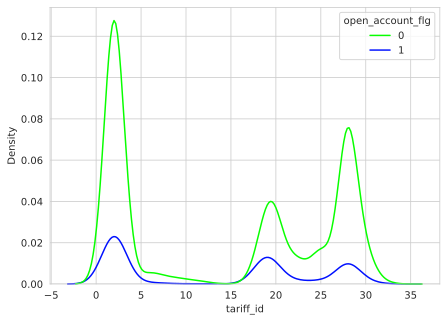

In [63]:
plt.figure(figsize=(7,5))
sns.kdeplot(x = 'tariff_id', hue = 'open_account_flg', data = credit, palette = 'hsv')

<Axes: xlabel='open_account_flg', ylabel='tariff_id'>

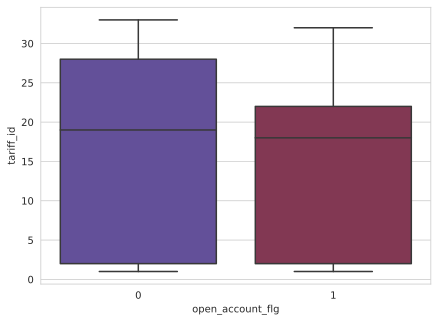

In [64]:
plt.figure(figsize=(7,5))
sns.boxplot(data = credit, y = 'tariff_id', x = 'open_account_flg', palette = 'twilight')

*Исходя из графиков, можно сделать предположение, что тарифные планы для клиентов 0 и 1 группы имеют различия. Чтобы уедиться в этом, построим сводную таблицу по количеству клиентов на тариф и сверим насколько пропорция клиентов по тарифу отличается от общей пропорции клиентов, которая составляет приблизительно 17 к 83.*

In [65]:
tariff_table = pd.pivot_table(credit, index = 'tariff_id', columns = 'open_account_flg', values='client_id', aggfunc = len).reset_index()
tariff_table.rename(columns = {'tariff_id': 'tariff',  0: 'no', 1: 'yes'}, inplace=True)
tariff_table['diff_yes'] = np.round(tariff_table['yes']/(tariff_table['no'] + tariff_table['yes']),2)
tariff_table['diff_no'] = np.round(tariff_table['no']/(tariff_table['no'] + tariff_table['yes']),2)
tariff_table['total_comp'] = '17.6 : 82.4'

In [66]:
tariff_table.sort_values(by='diff_yes', ascending=False).head(10)

open_account_flg  tariff       no      yes  diff_yes  diff_no   total_comp
4                      5      3.0     33.0      0.92     0.08  17.6 : 82.4
18                    19   9671.0   5866.0      0.38     0.62  17.6 : 82.4
17                    18   2347.0    992.0      0.30     0.70  17.6 : 82.4
30                    31    239.0     78.0      0.25     0.75  17.6 : 82.4
12                    13     43.0     13.0      0.23     0.77  17.6 : 82.4
20                    21    106.0     26.0      0.20     0.80  17.6 : 82.4
1                      2  56164.0  13189.0      0.19     0.81  17.6 : 82.4
3                      4    594.0    123.0      0.17     0.83  17.6 : 82.4
11                    12    256.0     47.0      0.16     0.84  17.6 : 82.4
27                    28  33600.0   5515.0      0.14     0.86  17.6 : 82.4

*По таблице явно выделяется **5 тариф**. Но количество клиентов относительно общего количества всех клиентов ничтожно мало.*
*Можно обратить внимание на **тарифы 18 и 19**, где идет превышение пропорции. И на тарифы - **2, 4, 12, 13, 21, 31**, где соблюдена пропорция.*
*Все остальные тарифы будем считать по умолчанию тарифами для клиентов без кредитного счета.*

*Количество месяцев по кредитованию.*

In [67]:
plt.figure(figsize=(7,5))
sns.boxplot(data = credit, y = 'credit_month', x ='open_account_flg', palette = 'twilight_shifted')

<Axes: xlabel='open_account_flg', ylabel='credit_month'>

*Графики практически идентичны. Признак не является значимым при составлении портрета клиента для открытия кредитного счета.*

*Проверим скоринговую оценку.*

In [68]:
credit.groupby(['open_account_flg'])['score_shk'].describe(percentiles=[])

count      mean       std       min       50%       max
open_account_flg                                                            
0                 140686.0  0.466675  0.123417  0.000000  0.458822  1.128291
1                  30055.0  0.482560  0.127366  0.072468  0.473354  1.054699

<Axes: xlabel='open_account_flg', ylabel='score_shk'>

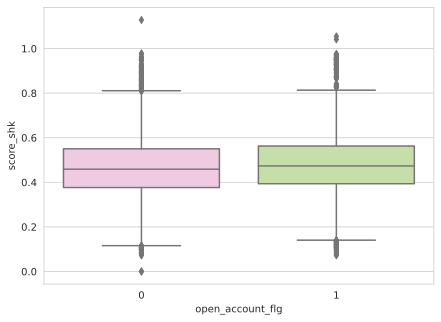

In [69]:
plt.figure(figsize=(7,5))
sns.boxplot(data = credit, y = 'score_shk', x ='open_account_flg', palette = 'PiYG')

*По сводной таблице и графику можно заметить, что есть небольшое отличие по средним и распределению величин в пользу клиентов, открывших кредит. Проверим, является ли это различие статистически значимым.*

In [91]:
open_yes = shuffle(open_yes)
open_no = shuffle(open_no)
statistics_c, p_value_c = st.ttest_ind(open_yes['score_shk'][:500], open_no['score_shk'][:500])
print(f'''Статистика: {statistics_c}.
Уровень значимости: {p_value_c}.''')

Статистика: 1.9334411827940214.
Уровень значимости: 0.053464422871064385.


***При переборе нескольких выборок объемом в 500 единиц, p-значение варьируется от 0.15 до 0.01. В данном случае, думаю, уместо включить признак в отличительный, исходя из того, что более высокая кредитная оценка служит одним из критериев для одобрения кредита.***

**Номинативные (кодированные) признаки.**

*Пол.*

*Построим график и проверим данные с помощью сводной таблицы.*

<Axes: xlabel='count', ylabel='gender'>

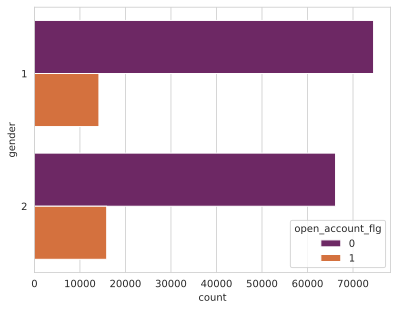

In [71]:
sns.countplot(data = credit, y = 'gender', hue = 'open_account_flg', palette = 'inferno')

In [72]:
gender = pd.pivot_table(credit, index = 'gender', columns = 'open_account_flg', values = 'client_id', aggfunc = len)
gender.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
gender['share_yes'] = np.round((gender['yes'] / (gender ['no'] + gender['yes'])) * 100, 2)
gender['share_no'] = np.round((gender['no'] / (gender ['no'] + gender['yes'])) * 100, 2)
gender['total'] = gender['yes'] + gender['no']
gender['share_total'] = '17.6 : 82.4'
gender

open_account_flg     no    yes  share_yes  share_no  total  share_total
gender                                                                 
1                 74521  14174      15.98     84.02  88695  17.6 : 82.4
2                 66165  15881      19.36     80.64  82046  17.6 : 82.4

*По графику и сводной можно заметить, что доля тех, кто имеет кредитный счет, и тех, кто не имеет, различается по полу. Проверим с помощью z-теста для пропорций.*

In [73]:
z, p_value = sm.stats.proportions_ztest([gender['yes'][1], gender['yes'][2]], [gender['total'][1], gender['total'][2]])
print(f'Статистика: {z}, критерий: {p_value}')

Статистика: -18.298490758503814, критерий: 8.507307052103976e-75


***Р-значение ниже порогового уровня значимости в 0.05 - можно считать, что критерий по полу является статистически значимым и мы можем использовать его для портрета клиента, открывающего кредит.***

*Семейное положение.*

<Axes: xlabel='count', ylabel='marital_status'>

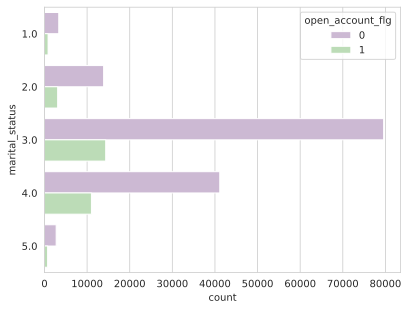

In [74]:
sns.countplot(data = credit, y = 'marital_status', hue = 'open_account_flg', palette = 'PRGn')

In [75]:
marital = pd.pivot_table(credit, index = 'marital_status', columns = 'open_account_flg', values = 'client_id', aggfunc = len)
marital.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
marital['share_yes'] = np.round((marital['yes'] / (marital ['no'] + marital['yes'])) * 100, 2)
marital['share_no'] = np.round((marital['no'] / (marital ['no'] + marital['yes'])) * 100, 2)
marital['total'] = marital['yes'] + marital['no']
marital['share_total'] = '17.6 : 82.4'

marital

open_account_flg     no    yes  share_yes  share_no  total  share_total
marital_status                                                         
1.0                3350    846      20.16     79.84   4196  17.6 : 82.4
2.0               13879   3090      18.21     81.79  16969  17.6 : 82.4
3.0               79586  14367      15.29     84.71  93953  17.6 : 82.4
4.0               41132  11016      21.12     78.88  52148  17.6 : 82.4
5.0                2739    736      21.18     78.82   3475  17.6 : 82.4

*В рамках семейного положения, можно отметить, что клиенты со статусом **1.0, 4.0 и 5.0** более склонны к открытию кредитного счета. При этом половину всех клиентов с кредитным счетом составляют клиенты с семейным статусом **3.0**.
Оставим признак как вспомогательный при составлении портрета.*

*Думаю, учитывая данные по полу и семейному статусу, можно выделить кластеры, которые более склонны к получению кредитного счета.*
*Постороим сводную таблицу для комбинации по полу и семейному статусу.*

In [76]:
gen_m = pd.pivot_table(credit, index = ['gender','marital_status'], columns = 'open_account_flg', values = 'client_id', aggfunc = len)
gen_m.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
gen_m['share_yes'] = np.round((gen_m['yes'] / (gen_m ['no'] + gen_m['yes'])) * 100, 2)
gen_m['share_no'] = np.round((gen_m['no'] / (gen_m ['no'] + gen_m['yes'])) * 100, 2)
gen_m['total'] = gen_m['yes'] + gen_m['no']
gen_m['share_total'] = '17.6 : 82.4'
gen_m.sort_values(by='share_yes', ascending=False).head(6)

open_account_flg          no   yes  share_yes  share_no  total  share_total
gender marital_status                                                      
2      4.0             19328  6355      24.74     75.26  25683  17.6 : 82.4
       5.0               213    69      24.47     75.53    282  17.6 : 82.4
       2.0              4103  1162      22.07     77.93   5265  17.6 : 82.4
       1.0              1316   372      22.04     77.96   1688  17.6 : 82.4
1      5.0              2526   667      20.89     79.11   3193  17.6 : 82.4
       1.0              2034   474      18.90     81.10   2508  17.6 : 82.4

*Исходя из данных свода можно выделить следующие кластеры, как более склонные попасть в группу 1.0:*

*   1 - 5
*   2 - 1
*   2 - 2
*   2 - 4
*   2 - 5

*Работа, образование и регион проживания.*

<Axes: xlabel='job_position', ylabel='Density'>

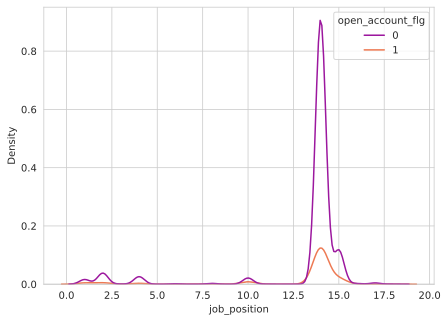

In [78]:
plt.figure(figsize=(7,5))
sns.kdeplot(x = 'job_position', hue = 'open_account_flg', data = credit, palette = 'plasma')

In [79]:
job = pd.pivot_table(credit, index = ['job_position'], columns = 'open_account_flg', values = 'client_id', aggfunc = len)
job.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
job['share_yes'] = np.round((job['yes'] / (job['no'] + job['yes'])) * 100, 2)
job['share_no'] = np.round((job['no'] / (job['no'] + job['yes'])) * 100, 2)
job['total'] = job['yes'] + job['no']
job['share_total'] = '17.6 : 82.4'
job.sort_values(by='yes', ascending=False).head(5)

open_account_flg        no      yes  share_yes  share_no     total  \
job_position                                                         
14                112274.0  22402.0      16.63     83.37  134676.0   
15                 14334.0   3340.0      18.90     81.10   17674.0   
10                  2618.0   1489.0      36.26     63.74    4107.0   
2                   4705.0    885.0      15.83     84.17    5590.0   
1                   1984.0    807.0      28.91     71.09    2791.0   

open_account_flg  share_total  
job_position                   
14                17.6 : 82.4  
15                17.6 : 82.4  
10                17.6 : 82.4  
2                 17.6 : 82.4  
1                 17.6 : 82.4

*В самых крупных категориях по признаку профессии сохраняется пропорция. Можно выделить группу **10.0 и 1.0** как предпочтительные для открытия кредитного счета.*

<Axes: xlabel='count', ylabel='education'>

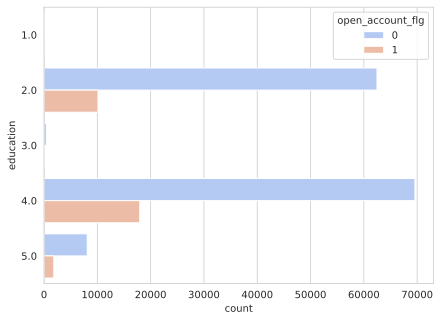

In [80]:
plt.figure(figsize=(7,5))
sns.countplot(y = 'education', hue = 'open_account_flg', data = credit, palette = 'coolwarm')

In [81]:
edu = pd.pivot_table(credit, index = ['education'], columns = 'open_account_flg', values = 'client_id', aggfunc = len)
edu.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
edu['share_yes'] = np.round((edu['yes'] / (edu['no'] + edu['yes'])) * 100, 2)
edu['share_no'] = np.round((edu['no'] / (edu['no'] + edu['yes'])) * 100, 2)
edu['total'] = edu['yes'] + edu['no']
edu['share_total'] = '17.6 : 82.4'
edu

open_account_flg     no    yes  share_yes  share_no  total  share_total
education                                                              
1.0                  82     25      23.36     76.64    107  17.6 : 82.4
2.0               62463  10130      13.95     86.05  72593  17.6 : 82.4
3.0                 457    108      19.12     80.88    565  17.6 : 82.4
4.0               69580  17955      20.51     79.49  87535  17.6 : 82.4
5.0                8104   1837      18.48     81.52   9941  17.6 : 82.4

*В образовании выделяются категории **1.0 и 4.0**.*

<Axes: xlabel='count', ylabel='okrug'>

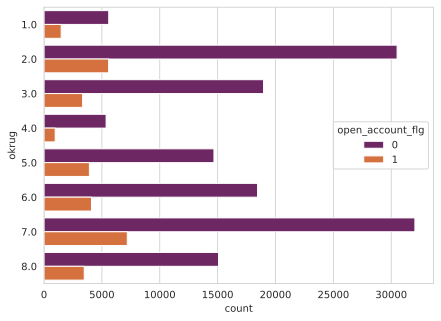

In [82]:
plt.figure(figsize=(7,5))
sns.countplot(y = 'okrug', hue = 'open_account_flg', data = credit, palette = 'inferno')

<Axes: xlabel='living_region', ylabel='Density'>

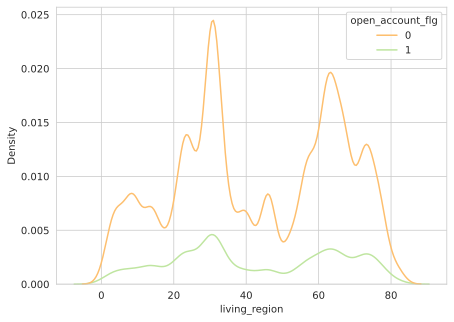

In [83]:
plt.figure(figsize=(7,5))
sns.kdeplot(x = 'living_region', hue = 'open_account_flg', data = credit, palette = 'Spectral')

*Округ распредяляется практически пропорционально соотношению открывших кредитный счет и не открывших. А вот график для региона проживания выглядит более пологим для тех, кто открыл кредитный счет.*

*Построим сводные по региону и округам.*

In [84]:
ok = pd.pivot_table(credit, index = ['okrug'], columns = 'open_account_flg', values = 'client_id', aggfunc = len)
ok.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
ok['share_yes'] = np.round((ok['yes'] / (ok['no'] + ok['yes'])) * 100, 2)
ok['share_no'] = np.round((ok['no'] / (ok['no'] + ok['yes'])) * 100, 2)
ok['total'] = ok['yes'] + ok['no']
ok['share_total'] = '17.6 : 82.4'
ok

open_account_flg     no   yes  share_yes  share_no  total  share_total
okrug                                                                 
1.0                5591  1482      20.95     79.05   7073  17.6 : 82.4
2.0               30506  5585      15.47     84.53  36091  17.6 : 82.4
3.0               18968  3334      14.95     85.05  22302  17.6 : 82.4
4.0                5364   964      15.23     84.77   6328  17.6 : 82.4
5.0               14682  3920      21.07     78.93  18602  17.6 : 82.4
6.0               18450  4101      18.19     81.81  22551  17.6 : 82.4
7.0               32046  7195      18.34     81.66  39241  17.6 : 82.4
8.0               15079  3474      18.72     81.28  18553  17.6 : 82.4

*Пропорция сохраняется для всех регионов. Можно выделить **1.0 и 5.0**.*

In [85]:
lr = pd.pivot_table(credit, index = ['living_region'], columns = 'open_account_flg', values = 'client_id', aggfunc = len)
lr.rename(columns = {0: 'no', 1: 'yes'}, inplace = True)
lr['share_yes'] = np.round((lr['yes'] / (lr['no'] + lr['yes'])) * 100, 2)
lr['share_no'] = np.round((lr['no'] / (lr['no'] + lr['yes'])) * 100, 2)
lr['total'] = lr['yes'] + lr['no']
lr['share_total'] = '17.6 : 82.4'
lr.sort_values(by='share_yes', ascending=False).head(5)

open_account_flg   no  yes  share_yes  share_no  total  share_total
living_region                                                      
81.0                8   24      75.00     25.00     32  17.6 : 82.4
49.0               10    9      47.37     52.63     19  17.6 : 82.4
48.0               38   31      44.93     55.07     69  17.6 : 82.4
78.0               21   10      32.26     67.74     31  17.6 : 82.4
19.0              393  183      31.77     68.23    576  17.6 : 82.4

*Думаю, лучше отсортировать по количеству открывших карту. По доле открывших - слишком маленькое число от общего.*

In [86]:
lr.sort_values(by='yes', ascending=False).head(10)

open_account_flg     no   yes  share_yes  share_no  total  share_total
living_region                                                         
31.0              10778  2258      17.32     82.68  13036  17.6 : 82.4
30.0               7344  1917      20.70     79.30   9261  17.6 : 82.4
73.0               6999  1736      19.87     80.13   8735  17.6 : 82.4
23.0               6680  1674      20.04     79.96   8354  17.6 : 82.4
63.0               7075  1228      14.79     85.21   8303  17.6 : 82.4
66.0               6123  1193      16.31     83.69   7316  17.6 : 82.4
57.0               6537  1130      14.74     85.26   7667  17.6 : 82.4
77.0               4200   954      18.51     81.49   5154  17.6 : 82.4
14.0               3388   935      21.63     78.37   4323  17.6 : 82.4
46.0               5532   934      14.44     85.56   6466  17.6 : 82.4

*Можно выделить как вспомогательный признак: **30, 23 и 14** регионы.*

# Вывод

*В ходе рассмотрения датасета 'credit.csv' можно выделить следующие показатели в рамках определения портрета клиента, который открыл кредитный счет в банке:*

***Ключевые показатели:***

*   сумма по кредиту: средняя сумма ниже, - составляет **23_000** против **26_000** -  но при этом разброс меньше;
*   тарифный план: **5, 18, 19**. При этом в тарифных планах: **2, 4, 12, 13, 21, 31** доля открывших кредитный счет соразмерна общей доле в таблице. Клиенты с остальными тарифными планами не склонны к открытию кредитного счета в банке;
*   кредитная оценка: в среднем выше на **0,02** пункта для тех, кто открывает кредитный счет;
*   соотношение пола и семейного статуса: группы **1-5, 2-1, 2-2, 2-4, 2-5**;

***Вспомогательные показатели:***

*   профессия: пункты **1 и 10**;
*   образование: пункты **1 и 4**;
*   округ: пункты **1 и 5**;
*   регион проживания: пункты **14, 23, 30**.